In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [4]:
#API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#Extracting the Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Importing Libraries

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

from sklearn.model_selection import train_test_split

In [41]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')
print(with_mask[0:5])
print(without_mask[0:5])

['with_mask_1578.jpg', 'with_mask_3338.jpg', 'with_mask_3545.jpg', 'with_mask_452.jpg', 'with_mask_2500.jpg']
['without_mask_1558.jpg', 'without_mask_983.jpg', 'without_mask_1801.jpg', 'without_mask_3169.jpg', 'without_mask_1126.jpg']


In [8]:
print(f"Number of images with mask: {len(with_mask)}")
print(f"Number of images without mask: {len(without_mask)}")

Number of images with mask: 3725
Number of images without mask: 3828


Creating Lables for the two class of Images

#with mask = 1
#without mask = 0

In [42]:
#create labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [43]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [44]:
labels = with_mask_labels + without_mask_labels

In [45]:
print(labels[0:5]) #y
print(len(labels))

[1, 1, 1, 1, 1]
7553


Displaying the images

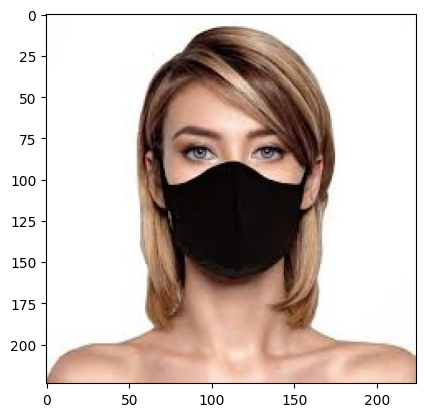

In [13]:
img = mpimg.imread('/content/data/with_mask/with_mask_2263.jpg')

# Display the image
plt.imshow(img)

plt.show()

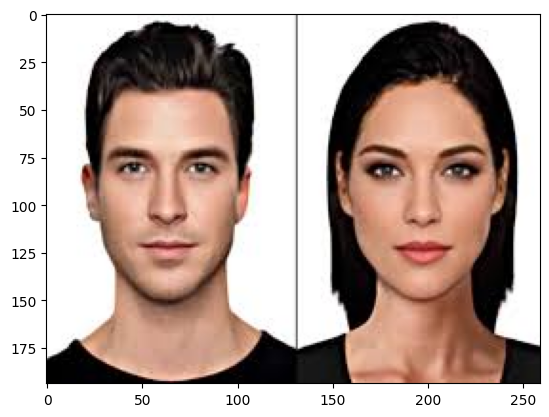

In [14]:
#without mask
img = mpimg.imread('/content/data/without_mask/without_mask_787.jpg')

# Display the image
plt.imshow(img)

plt.show()

Image Processing

1. Resize the image
2. Convert the images to numpy arrays

In [15]:
#converting the images
with_mask_path = '/content/data/with_mask/'
data = []

for i in with_mask:
  image =  Image.open(with_mask_path + i)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

#converting the images without mask
without_mask_path = '/content/data/without_mask/'

for i in without_mask:
  image =  Image.open(without_mask_path + i)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
print(data[0])
print(type(data))

[[[221 217 206]
  [222 218 207]
  [222 218 207]
  ...
  [212 199 183]
  [212 199 183]
  [214 201 185]]

 [[219 215 204]
  [221 217 206]
  [220 216 205]
  ...
  [211 198 182]
  [211 198 182]
  [212 199 183]]

 [[219 215 204]
  [221 217 206]
  [221 217 206]
  ...
  [212 199 183]
  [212 199 183]
  [212 199 183]]

 ...

 [[195 168 149]
  [212 186 168]
  [221 197 181]
  ...
  [236 221 137]
  [236 222 136]
  [234 220 135]]

 [[203 176 157]
  [216 190 173]
  [216 192 176]
  ...
  [231 215 145]
  [234 219 144]
  [234 219 145]]

 [[208 182 165]
  [221 195 178]
  [212 187 170]
  ...
  [188 171 123]
  [207 194 139]
  [222 209 152]]]
<class 'list'>


In [17]:
#Convert the labels and image list
X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)
type(X)
type(Y)
print(X[0])

(7553, 128, 128, 3)
(7553,)
[[[221 217 206]
  [222 218 207]
  [222 218 207]
  ...
  [212 199 183]
  [212 199 183]
  [214 201 185]]

 [[219 215 204]
  [221 217 206]
  [220 216 205]
  ...
  [211 198 182]
  [211 198 182]
  [212 199 183]]

 [[219 215 204]
  [221 217 206]
  [221 217 206]
  ...
  [212 199 183]
  [212 199 183]
  [212 199 183]]

 ...

 [[195 168 149]
  [212 186 168]
  [221 197 181]
  ...
  [236 221 137]
  [236 222 136]
  [234 220 135]]

 [[203 176 157]
  [216 190 173]
  [216 192 176]
  ...
  [231 215 145]
  [234 219 144]
  [234 219 145]]

 [[208 182 165]
  [221 195 178]
  [212 187 170]
  ...
  [188 171 123]
  [207 194 139]
  [222 209 152]]]


Train and Test Split using Sklearn


In [18]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)#80% will go to x_train and y_train, the rest will go to testing(20%)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print(Y)

[1 1 1 ... 0 0 0]


In [21]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [22]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train[0])
print(X_train_scaled[0])


[[[224 227 236]
  [225 228 237]
  [225 228 237]
  ...
  [239 242 247]
  [239 242 247]
  [239 242 247]]

 [[224 227 236]
  [225 228 237]
  [225 228 237]
  ...
  [239 242 247]
  [239 242 247]
  [239 242 247]]

 [[224 227 236]
  [225 228 237]
  [225 228 237]
  ...
  [239 242 247]
  [239 242 247]
  [239 242 247]]

 ...

 [[222 222 232]
  [223 223 233]
  [224 224 234]
  ...
  [240 240 250]
  [238 241 250]
  [238 241 250]]

 [[221 221 231]
  [222 222 232]
  [223 223 233]
  ...
  [240 240 250]
  [237 240 249]
  [237 240 249]]

 [[221 221 231]
  [221 221 231]
  [222 222 232]
  ...
  [239 240 250]
  [236 239 248]
  [236 239 248]]]
[[[0.87843137 0.89019608 0.9254902 ]
  [0.88235294 0.89411765 0.92941176]
  [0.88235294 0.89411765 0.92941176]
  ...
  [0.9372549  0.94901961 0.96862745]
  [0.9372549  0.94901961 0.96862745]
  [0.9372549  0.94901961 0.96862745]]

 [[0.87843137 0.89019608 0.9254902 ]
  [0.88235294 0.89411765 0.92941176]
  [0.88235294 0.89411765 0.92941176]
  ...
  [0.9372549  0.9490196

Convolutional Neural Network (CNN)

In [35]:
import tensorflow as tf
from tensorflow import keras
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
#compile
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
170/170 [==============================] - 7s 21ms/step - loss: 0.4406 - acc: 0.7911 - val_loss: 0.2410 - val_acc: 0.8942
Epoch 2/50
170/170 [==============================] - 3s 17ms/step - loss: 0.2949 - acc: 0.8792 - val_loss: 0.2125 - val_acc: 0.9174
Epoch 3/50
170/170 [==============================] - 3s 17ms/step - loss: 0.2355 - acc: 0.9082 - val_loss: 0.1987 - val_acc: 0.9273
Epoch 4/50
170/170 [==============================] - 3s 20ms/step - loss: 0.2073 - acc: 0.9307 - val_loss: 0.1248 - val_acc: 0.9570
Epoch 5/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1588 - acc: 0.9456 - val_loss: 0.1227 - val_acc: 0.9636
Epoch 6/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1506 - acc: 0.9489 - val_loss: 0.1041 - val_acc: 0.9769
Epoch 7/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1231 - acc: 0.9610 - val_loss: 0.1279 - val_acc: 0.9587
Epoch 8/50
170/170 [==============================] - 3s 20ms/step - 

Evaluate the Model

In [38]:
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"Test Accuracy = {accuracy}")

48/48 [==============================] - 1s 11ms/step - loss: 0.2821 - acc: 0.9590
Test Accuracy = 0.9589675664901733


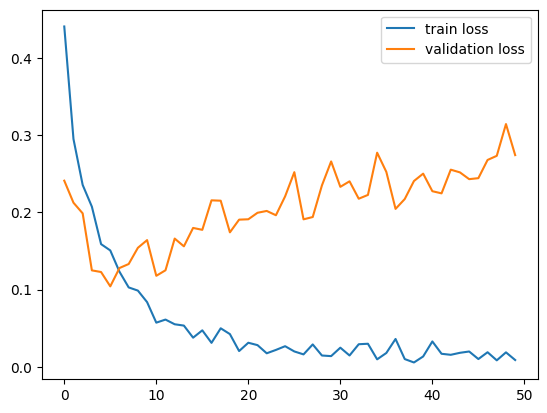

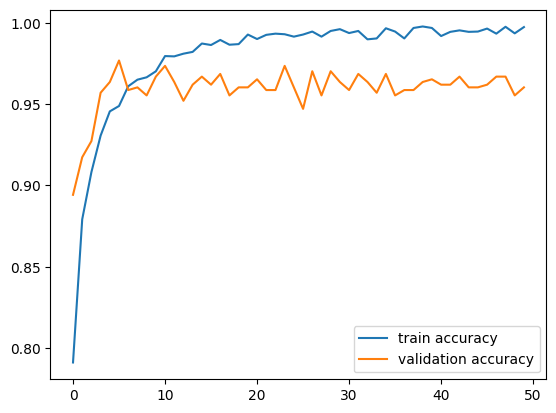

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Driver

Enter the path of image: /content/without_mask_16.jpg


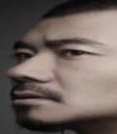

1/1 [==============================] - 0s 18ms/step
[[0.8444345  0.19286771]]
1
The person is not wearing


In [50]:
image_path = input("Enter the path of image: ")
input_image = cv2.imread(image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_reshape = np.reshape(input_image_scaled,[1,128,128,3])
prediction = model.predict(input_reshape)

print(prediction)
print(input_pred_label)
input_pred_label = np.argmax(prediction)

if input_pred_label == 1:
  print("The person is wearing a mask")
else:
  print("The person is not wearing")

